# Phase 2: Federated Learning Using Logistic Regression

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Executive Summary](#execsum)
- [Introduction](#intro)
- [Phase 1 Recap](#recap)
- [Phase 2 Overview](#phase2)
- [Federated Learning and Its Benefits](#fedlearn)
- [Focus of This Phase](#fedavg)
- [Developing the Federated Logistic Regression Model](#phase2_code)

## <font color='289C4E'>Executive Summary<a id='execsum'></a> [↑](#top)

Credit card fraud is a significant issue for financial institutions, leading to substantial financial losses and compromised customer trust. Detecting fraudulent transactions is challenging due to the highly imbalanced nature of the data, where fraudulent transactions are a tiny fraction of all transactions.
    
This project explores advanced techniques to enhance credit card fraud detection. By leveraging the [Credit Card Fraud Detection dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), the aim is to compare the performance, complexity, and computational intensity of centralized machine learning models versus decentralized federated learning (using logistic regression). The federated learning phase of the project is then extended into two additional phases that investigate the benefits of integrating blockchain (_Phase 3A_) and zero knowledge proofs (_Phase 3B_).

The main objective of Phase 2 was to implement federated learning to enhance credit card fraud detection while maintaining data privacy. By distributing model training across multiple clients (simulating different financial institutions) and utilizing Federated Averaging (FedAvg), the project aimed to leverage collective knowledge from various datasets without sharing sensitive data.

**Approach**:

The dataset was split into multiple subsets, each representing a different client.
Each client trained a logistic regression model on its local data using the Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance.
Model updates from each client were aggregated using the FedAvg algorithm to create a global model.
The global model was evaluated on a separate test set to assess its performance.

**Results**:

- _High accuracy (98.86%)_ reflects the model's ability to correctly classify the majority of transactions.
- _Recall of 90.82%_ indicates the model's effectiveness in identifying fraudulent transactions, crucial for minimizing missed fraud cases.
- _Precision of 12.16%_ highlights a challenge with false positives, where many flagged transactions were not actually fraudulent.
- _F1 score of 21.45%_ shows a balance between precision and recall, but further improvement in precision is needed.
- _ROC AUC score of 96.41%_ indicates excellent overall classification ability.
- _AUPRC of 71.98%_ provides a more informative measure for imbalanced datasets, showing good performance in detecting the minority class (fraudulent transactions).

**Key Benefits Demonstrated**:

1. **Data Privacy**: Federated learning ensured that sensitive data remained decentralized, enhancing privacy and security.
Collaboration without Data Sharing: Multiple clients could collaboratively improve the fraud detection model without sharing raw data, fostering trust among institutions.
2. **Improved Model Performance**: Leveraging broader datasets from multiple clients led to a more robust and accurate model.
3. **Regulatory Compliance**: The approach facilitated compliance with data protection regulations by keeping data local and only sharing model updates.
4. **Scalability**: The federated learning model can easily scale to include more institutions, further enhancing model performance as more data becomes available.

**Conclusion**:

Phase 2 successfully demonstrated the feasibility and benefits of federated learning in credit card fraud detection. By ensuring data privacy and leveraging collective knowledge from multiple institutions, the federated learning approach improved the model's performance while addressing key concerns in the finance industry. This sets a strong foundation for integrating further advanced techniques such as blockchain and zero knowledge proofs in subsequent phases.

## <font color='289C4E'>Introduction<a id='intro'></a> [↑](#top)

In this phase, the project transitions from a centralized logistic regression model to a federated learning approach. Federated learning enables collaborative training of machine learning models across multiple decentralized entities (clients), such as different banks, without sharing their data. This ensures data privacy while leveraging the collective knowledge of all participants. 
    
The implementation focuses on a federated logistic regression model using the Federated Averaging (FedAvg) algorithm to improve fraud detection while maintaining data security and privacy.


## <font color='289C4E'>Phase 1 Recap<a id='recap'></a> [↑](#top)

Phase 1 aimed to establish a baseline model and better understand the data. A centralized logistic regression model was developed for fraud detection. The Synthetic Minority Over-sampling Technique (SMOTE) was applied to address class imbalance, and the model was evaluated using various metrics, including accuracy, precision, recall, F1 score, ROC AUC, and AUPRC.

### Results from Phase 1

- **Accuracy**: High accuracy was achieved, but it was not sufficient given the class imbalance.
- **Precision**: Low precision indicated many false positives.
- **Recall**: High recall was achieved, successfully identifying most fraudulent transactions.
- **F1 Score**: A balanced metric indicated the need for better precision.
- **AUPRC**: Provided a more informative measure for the imbalanced dataset.

## <font color='289C4E'>Phase 2 Overview<a id='phase2'></a> [↑](#top)

In Phase 2, a federated learning approach is implemented to enhance the fraud detection model. Federated learning allows multiple clients to collaboratively train a shared model without exchanging their raw data. Instead, model updates are shared and aggregated to form a global model. This phase focuses on applying Federated Averaging (FedAvg) with logistic regression.

### Goals of Phase 2

1. **Data Privacy**: Ensure that client data remains decentralized and secure.
2. **Collaboration**: Leverage data from multiple clients to improve model performance.
3. **Scalability**: Demonstrate the scalability of federated learning for large-scale fraud detection.
4. **Model Performance**: Improve the precision and recall of the fraud detection model.


## <font color='289C4E'>Federated Learning and Its Benefits<a id='fedlearn'></a> [↑](#top)

### What is Federated Learning?

Federated Learning is a machine learning paradigm where multiple clients (e.g., banks, financial institutions) collaboratively train a model under the orchestration of a central server while keeping the training data decentralized. Each client trains the model on its local data and only shares model updates (such as weights and biases) with the central server.


![Federated Learning Process](pics/General-federated-learning-architecture.png)

_Figure 1: The process of Federated Learning._
    

### Benefits of Federated Learning

1. **Data Privacy**: Clients' raw data never leaves their local environment, significantly enhancing data privacy and security.
2. **Regulatory Compliance**: Helps organizations comply with data protection regulations such as GDPR and CCPA.
3. **Scalability**: Capable of scaling to a large number of clients, leveraging diverse datasets.
4. **Improved Model Performance**: By aggregating knowledge from multiple clients, federated learning can improve model robustness and generalization.

### Problems Addressed by Federated Learning

1. **Ensuring Data Privacy**: In the financial industry, data privacy is paramount. Federated learning ensures that sensitive customer data remains within the local servers of each bank, mitigating the risk of data breaches and ensuring compliance with privacy laws.
2. **Building Trust Among Institutions**: Banks and financial institutions are often hesitant to share data due to competitive and privacy concerns. Federated learning allows these entities to collaborate without exposing their proprietary data, fostering trust and cooperation.
3. **Access to Broader Datasets**: Individual, or smaller, banks may have limited datasets, which can constrain the performance of machine learning models. Federated learning allows institutions to leverage a broader dataset by aggregating knowledge from multiple sources, leading to more robust and accurate models.
4. **Regulatory Compliance**: By keeping data decentralized and only sharing model updates, federated learning helps institutions comply with stringent data protection regulations, such as GDPR in Europe and CCPA in California.

### Federated Averaging (FedAvg)

Federated Averaging is a key algorithm in federated learning. It works by:
1. **Local Training**: Each client trains a model on its local data.
2. **Model Update**: Clients send their model updates (weights and biases) to the central server.
3. **Aggregation**: The central server averages these updates to create a new global model.
4. **Global Model Distribution**: The global model is sent back to the clients for further local training.

This iterative process continues until the model converges.


## <font color='289C4E'>Focus of This Phase: Federated Logistic Regression Using Federated Averaging<a id='fedavg'></a> [↑](#top)

### Objective

The primary objective of this phase is to implement a federated logistic regression model for credit card fraud detection using the Federated Averaging (FedAvg) algorithm. This involves splitting the dataset among multiple clients, performing local training with SMOTE to handle class imbalance, and aggregating the local models to form a global model.

### Steps Involved

1. **Data Distribution**: Split the dataset into multiple subsets for different clients, ensuring an approximately equal number of fraudulent transactions in each subset.
2. **Local Training**: Each client trains a logistic regression model on its local data using SMOTE for class imbalance handling.
3. **Model Aggregation**: Aggregate the model weights and biases from all clients to create a global model.
4. **Global Model Evaluation**: Evaluate the performance of the global model on a separate test set.

### Implementation Details

1. **Stratified Splitting**: Ensuring that each client receives a balanced distribution of fraudulent transactions.
2. **Local Resampling**: Applying SMOTE locally on each client's data to address class imbalance.
3. **Federated Averaging**: Implementing the FedAvg algorithm to aggregate local models into a global model.
4. **Evaluation Metrics**: Using metrics such as accuracy, precision, recall, F1 score, ROC AUC, and AUPRC to evaluate the global model.

By the end of this phase, the goal is to demonstrate that federated learning can effectively enhance the performance of the fraud detection model while maintaining data privacy and security.


#### _Glossary_
- **Logistic Regression**: a binary classification statistical method  that models the probability of a binary outcome based on one or more predictor variables.
- **Federated Learning**: A machine learning approach where multiple clients collaboratively train a model while keeping their data decentralized.
- **Federated Averaging (FedAvg)**: An algorithm in federated learning that aggregates model updates from multiple clients to form a global model.
- **SMOTE**: Synthetic Minority Over-sampling Technique, used to address class imbalance by generating synthetic samples for the minority class.
- **AUPRC**: Area Under the Precision-Recall Curve, a metric that is particularly useful for evaluating models on imbalanced datasets.

## <font color='289C4E'>Developing the Federated Logistic Regression Model:<a id='phase2_code'></a> [↑](#top)
1. [**Import Libraries**](#import): 
Import necessary libraries for data handling, model training, and evaluation.

2. [**Load and Preprocess the Dataset**](#load): 
Load the dataset and preprocess it by scaling relevant features.

3. [**Split the Dataset**](#split): 
Split the dataset into training and test sets to ensure the test set remains unseen during training.

4. [**Stratified Split for Clients**](#stratsplit): 
Split the training data into multiple subsets for clients, ensuring each client has a balanced distribution of fraudulent transactions.

5. [**Train Local Models**](#train): 
Each client trains a logistic regression model on its local data using SMOTE to handle class imbalance.

6. [**Aggregate Models**](#agg): 
Aggregate the local models' weights to create a global model.

7. [**Evaluate the Global Model**](#eval): 
Evaluate the global model on the test set using various metrics, including AUPRC.

### 1. Import the libraries <a id='import'></a> [↑](#phase2_code)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


### 2. Load and Preprocess the Dataset <a id='load'></a> [↑](#phase2_code)

See Phase 1 for a comprehensive exploratory data analysis (EDA) of the credit card fraud dataset.The remaining phases will focus on model generation rather than EDA.

In [8]:
# Load dataset
df = pd.read_csv('creditcard.csv')

# Scaling 'Amount' and 'Time' features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns and replace with scaled versions
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', df.pop('scaled_amount'))
df.insert(1, 'scaled_time', df.pop('scaled_time'))

# Verify the changes
df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### 3. Split the Dataset into Train and Test Sets <a id='split'></a> [↑](#phase2_code)

In [9]:
# Split the dataset into train and test sets (80% train, 20% test)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


Train set: (227845, 30), (227845,)
Test set: (56962, 30), (56962,)


### 4. Split the Training Data Across Clients with Stratification <a id='stratsplit'></a> [↑](#phase2_code)

In [10]:
def stratified_split(data, target, num_splits):
    skf = StratifiedKFold(n_splits=num_splits)
    splits = []
    for _, test_idx in skf.split(data, target):
        splits.append(test_idx)
    return splits

num_clients = 5
client_indices = stratified_split(X_train, y_train, num_clients)
client_data = [(X_train.iloc[indices], y_train.iloc[indices]) for indices in client_indices]

# Verify the distribution of fraudulent transactions in each client
for i, (X_client, y_client) in enumerate(client_data):
    print(f'Client {i+1} - Fraudulent transactions: {sum(y_client)}, Total transactions: {len(y_client)}')


Client 1 - Fraudulent transactions: 78, Total transactions: 45569
Client 2 - Fraudulent transactions: 79, Total transactions: 45569
Client 3 - Fraudulent transactions: 79, Total transactions: 45569
Client 4 - Fraudulent transactions: 79, Total transactions: 45569
Client 5 - Fraudulent transactions: 79, Total transactions: 45569


### 5. Train Local Models on Each Client <a id='train'></a> [↑](#phase2_code)

In [ ]:
def train_client_model(X_client, y_client):
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X_client, y_client)
    
    model = LogisticRegression(class_weight='balanced', solver='liblinear')
    model.fit(X_resampled, y_resampled)
    
    return model.coef_, model.intercept_

client_weights = []
client_intercepts = []

for X_client, y_client in client_data:
    coef, intercept = train_client_model(X_client, y_client)
    client_weights.append(coef)
    client_intercepts.append(intercept)

### 6. Aggregate Local Models to Form the Global Model <a id='agg'></a> [↑](#phase2_code)

In [11]:
def aggregate_models(client_weights, client_intercepts):
    avg_weights = np.mean(client_weights, axis=0)
    avg_intercept = np.mean(client_intercepts, axis=0)
    return avg_weights, avg_intercept

global_weights, global_intercept = aggregate_models(client_weights, client_intercepts)

# Initialize the global model
X_init, _, y_init, _ = train_test_split(X_train, y_train, test_size=0.99, random_state=42, stratify=y_train)
global_model = LogisticRegression(class_weight='balanced', solver='liblinear')
global_model.fit(X_init, y_init)

# Set the coefficients and intercepts of the global model
global_model.coef_ = global_weights
global_model.intercept_ = global_intercept


### 7. Evaluate the Global Model on the Test Set <a id='eval'></a> [↑](#phase2_code)

In [12]:
# Predict on the test set
y_test_pred = global_model.predict(X_test)
y_test_prob = global_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred)
final_recall = recall_score(y_test, y_test_pred)
final_f1 = f1_score(y_test, y_test_pred)
final_auc = roc_auc_score(y_test, y_test_prob)
final_auprc = average_precision_score(y_test, y_test_prob)

print('Final Federated Model Evaluation')
print('---' * 15)
print(f"Accuracy: {final_accuracy}")
print(f"Precision: {final_precision}")
print(f"Recall: {final_recall}")
print(f"F1 Score: {final_f1}")
print(f"ROC AUC Score: {final_auc}")
print(f"AUPRC: {final_auprc}")
print('---' * 15)


Final Federated Model Evaluation
---------------------------------------------
Accuracy: 0.9885537726905657
Precision: 0.12158469945355191
Recall: 0.9081632653061225
F1 Score: 0.21445783132530122
ROC AUC Score: 0.9640642765265927
AUPRC: 0.7198087758866923
---------------------------------------------


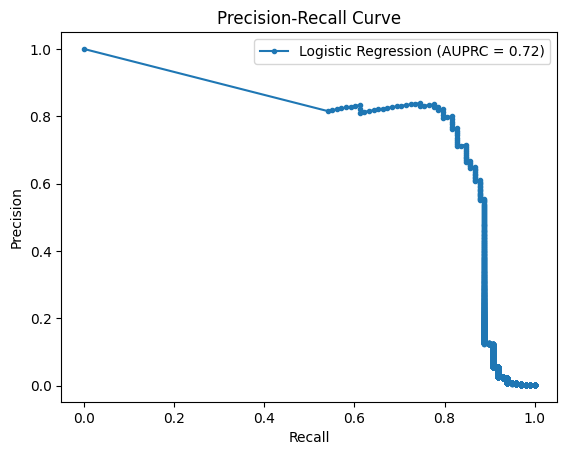

In [13]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.figure()
plt.plot(recall, precision, marker='.', label='Logistic Regression (AUPRC = %0.2f)' % final_auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### High-Level Summary of Results
In Phase 2, the objective was to implement a federated learning approach to enhance the performance of the credit card fraud detection model while ensuring data privacy and security. By distributing the training process across multiple clients (simulating different financial institutions) and using Federated Averaging (FedAvg), the goal was to leverage the collective knowledge from multiple datasets without sharing sensitive data. The federated logistic regression model achieved the following results:
```python 
- Accuracy: 98.86%
- Precision: 12.16%
- Recall: 90.82%
- F1 Score: 21.45%
- ROC AUC Score: 96.41%
- AUPRC: 71.98%
```
### Explanation of the Scores
- **Accuracy (98.86%)**: This indicates that 98.86% of the total transactions were correctly classified by the model. While a high accuracy is generally positive, it must be interpreted cautiously in the context of imbalanced datasets.
- **Precision (12.16%)**: Precision measures the proportion of true positive predictions among all positive predictions. A precision of 12.16% suggests that only 12.16% of the transactions flagged as fraudulent were actually fraudulent, indicating a high number of false positives.
- **Recall (90.82%)**: Recall, or sensitivity, measures the proportion of actual positives that were correctly identified. With a recall of 90.82%, the model successfully identifies a large majority of the fraudulent transactions, which is crucial in fraud detection to minimize missed fraudulent activities.
- **F1 Score (21.45%)**: The F1 Score is the harmonic mean of precision and recall. A score of 21.45% indicates a balance between precision and recall but reflects the need for further improvement in precision.
- **ROC AUC Score (96.41%)**: The ROC AUC score measures the model's ability to distinguish between classes. A score of 96.41% indicates excellent overall performance in distinguishing fraudulent from non-fraudulent transactions.
- **AUPRC (71.98%)**: The Area Under the Precision-Recall Curve (AUPRC) is particularly useful for imbalanced datasets. A value of 71.98% demonstrates good performance in identifying the minority class (fraudulent transactions), balancing the trade-off between precision and recall.